# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import OneHotEncoder 
from scipy.stats import norm
from scipy import stats
from scipy.stats import poisson
from math import factorial
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
import warnings
from scipy.special import factorial
from sklearn.linear_model import ElasticNet
import panel as pn

In [2]:
def ignore_warning():  
    return warnings.filterwarnings(action='ignore')

# function call
ignore_warning() 


# #load dataset

In [3]:
luas = pd.read_csv("TOA11.20231227155832.csv")

In [4]:
luas.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553


In [5]:
luas

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553
...,...,...,...,...,...,...,...,...
190,TOA11C03,All Luas lines,2022,2022,09,September,Number,3811093
191,TOA11C03,All Luas lines,2022,2022,10,October,Number,4219124
192,TOA11C03,All Luas lines,2022,2022,11,November,Number,4375705
193,TOA11C03,All Luas lines,2022,2022,12,December,Number,4030698


In [6]:
luas.tail()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
190,TOA11C03,All Luas lines,2022,2022,09,September,Number,3811093
191,TOA11C03,All Luas lines,2022,2022,10,October,Number,4219124
192,TOA11C03,All Luas lines,2022,2022,11,November,Number,4375705
193,TOA11C03,All Luas lines,2022,2022,12,December,Number,4030698
194,TOA11C03,All Luas lines,2022,2022,-,All months,Number,38667875


# EDA

In [7]:
#drop the columns which are not necessary
luas= luas.drop(["TLIST(A1)","STATISTIC","C01885V02316","UNIT"],axis=1)

In [8]:
#rename the columns to simpler names
luas= luas.rename(columns={"Statistic Label":"Luas line","VALUE": "Number of passengers"})

In [9]:
#checking if the changes have been made
luas.head()

,Luas line,Year,Month,Number of passengers
0,Red line,2018,January,1664495
1,Red line,2018,February,1657562
2,Red line,2018,March,1661098
3,Red line,2018,April,1794424
4,Red line,2018,May,1934553


In [10]:
#To understand number of rows and columns in the data
luas.shape

(195, 4)

In [11]:
#checking for dupliate rows
duplicate_rows_luas = luas[luas.duplicated()]
print('number of duplicate rows', duplicate_rows_luas.shape)

number of duplicate rows (0, 4)


In [12]:
#checking for null values in the data
print(luas.isnull().sum())

Luas line               0
Year                    0
Month                   0
Number of passengers    0
dtype: int64


In [13]:
#undertanding the overall data interms of datatype 
luas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Luas line             195 non-null    object
 1   Year                  195 non-null    int64 
 2   Month                 195 non-null    object
 3   Number of passengers  195 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.2+ KB


<Axes: xlabel='Number of passengers'>

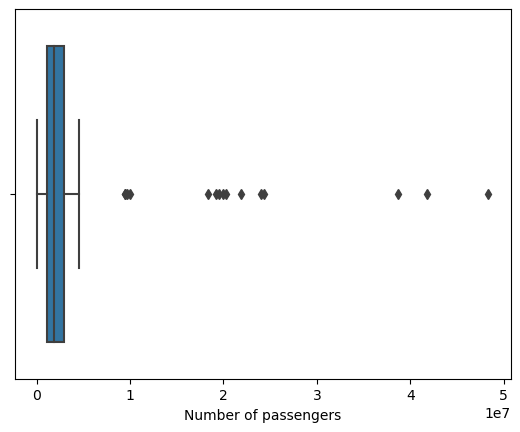

In [14]:
#checking for outliers using boxplot for target variable
sns.boxplot(data=luas, x="Number of passengers")

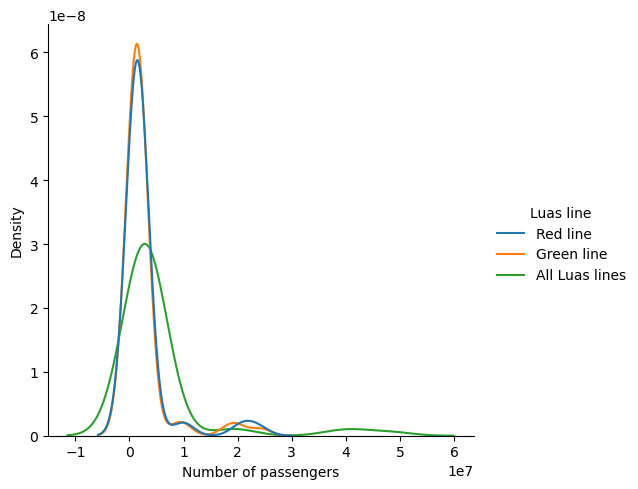

In [15]:
sns.displot(data=luas, x="Number of passengers", hue="Luas line", kind="kde")

In [16]:
# to understnad the skewness of data
luas_skew_value = stats.skew(luas['Number of passengers'], axis=0, bias=True)
print('Skew Value',luas_skew_value)

Skew Value 4.561489161469334


In [17]:
kurtosis_value = stats.kurtosis(luas['Number of passengers'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

kurtosis Value 23.031078370994173


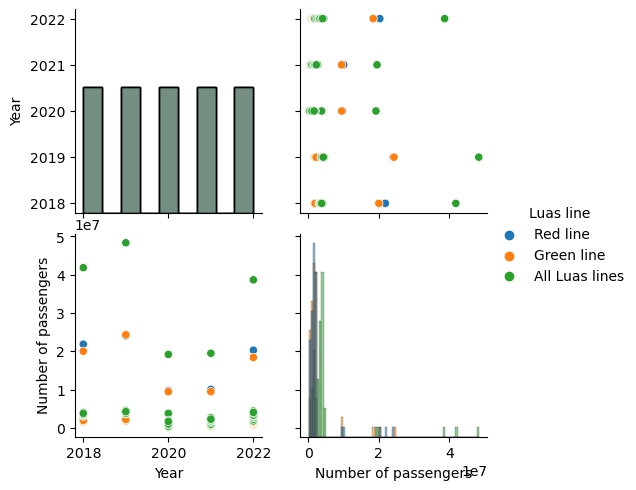

In [18]:
g = sns.PairGrid(luas, hue="Luas line")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [19]:
luas=luas.dropna()

In [20]:
luas.count()

Luas line               195
Year                    195
Month                   195
Number of passengers    195
dtype: int64

In [21]:
luas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Luas line             195 non-null    object
 1   Year                  195 non-null    int64 
 2   Month                 195 non-null    object
 3   Number of passengers  195 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.2+ KB


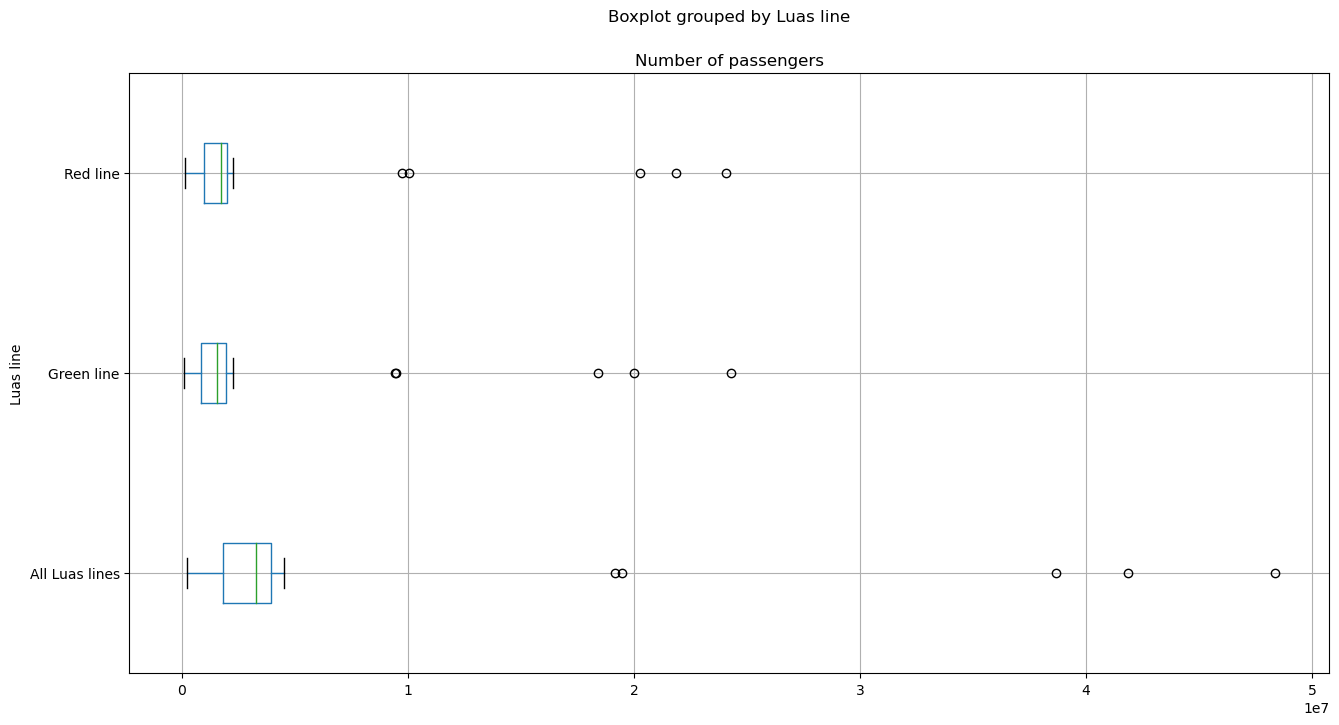

In [22]:
def box_plot_outliers(df):
    return df.boxplot(column='Number of passengers', by='Luas line', figsize=(15, 8), vert=False)

outdata = pd.DataFrame(luas)  

box_plot_outliers(outdata)

%matplotlib inline

plt.show()

In [23]:
def plot_boxplot(data_frame, col_name):
    plt.figure(figsize=(10,8))
    sns.boxplot(data = data_frame, x=col_name);

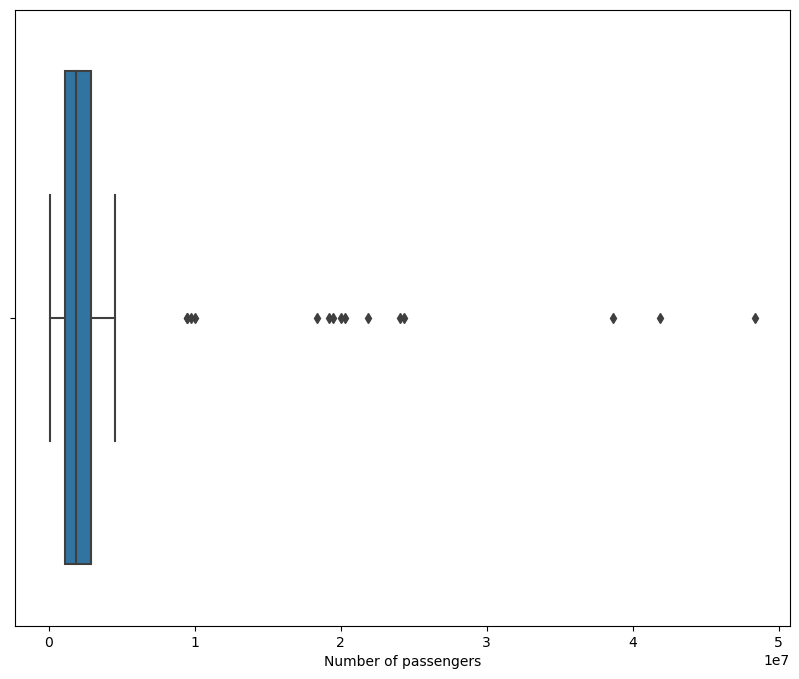

In [24]:
plot_boxplot(luas, 'Number of passengers')

In [25]:
def remove_outliers(dataframe, col_name):
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3-Q1 
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print('IQR',IQR)
    print('lower_limit',lower_limit)
    print('upper_limit',upper_limit)
    new_data = dataframe[(dataframe['Number of passengers'] > lower_limit) & (dataframe['Number of passengers'] < upper_limit)]
    return new_data
 
# 1st degree to remove outliers    
luas1 = remove_outliers(luas, 'Number of passengers')
# newdata_no_outliers = new_population_dataframe

IQR 1763632.0
lower_limit -1523448.5
upper_limit 5531079.5


<Axes: xlabel='Number of passengers'>

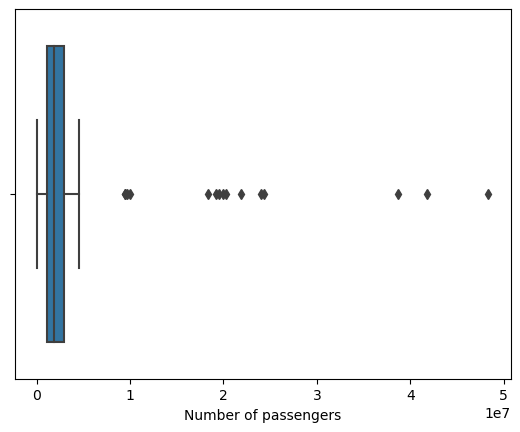

In [26]:
sns.boxplot(data=luas, x="Number of passengers")

In [27]:
luas1 = remove_outliers(luas1, 'Number of passengers')

IQR 1202227.25
lower_limit -782297.375
upper_limit 4026611.625


In [28]:
luas1 = remove_outliers(luas1, 'Number of passengers')

IQR 1075909.5
lower_limit -628903.25
upper_limit 3674734.75


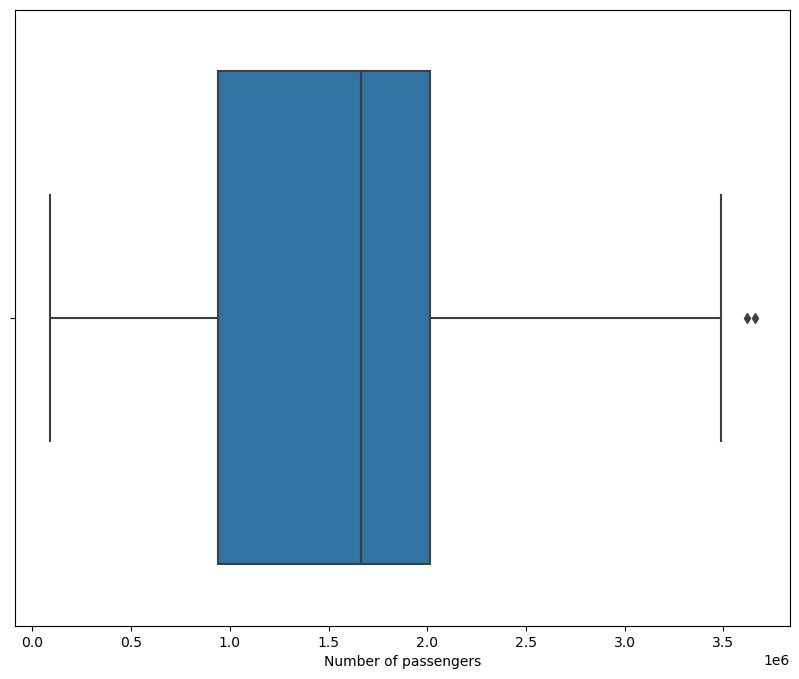

In [29]:
plot_boxplot(luas1, 'Number of passengers')

In [30]:
luas1_skew_value = stats.skew(luas1['Number of passengers'], axis=0, bias=True)
print('Skew Value',luas1_skew_value)

Skew Value 0.38630747823846173


In [31]:
kurtosis_value = stats.kurtosis(luas1['Number of passengers'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

kurtosis Value -0.07477521916615393


,Year,Number of passengers
Year,1.000000,-0.269202
Number of passengers,-0.269202,1.000000


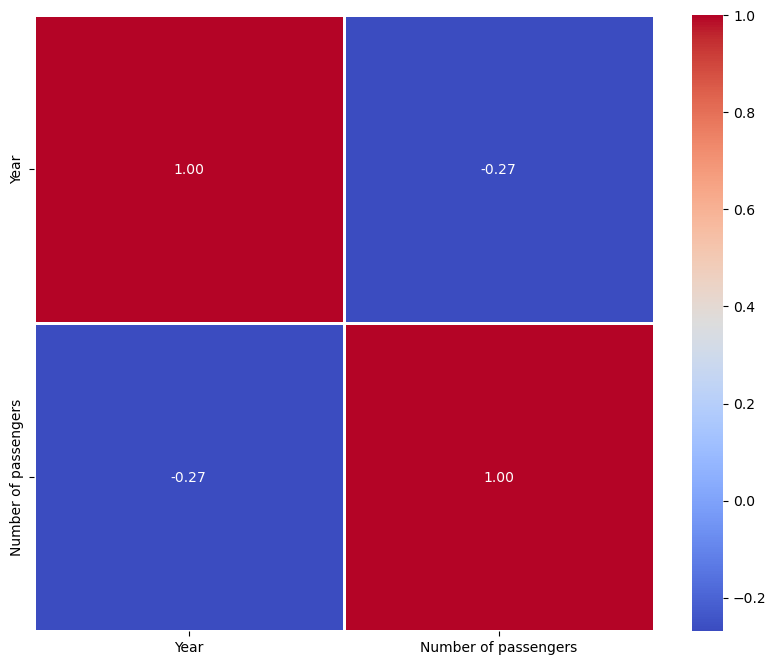

In [32]:
plt.figure(figsize=(10,8))
correlation = luas1.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt='.2f', linewidths=2, cmap="coolwarm")
correlation

<Axes: xlabel='Number of passengers', ylabel='Count'>

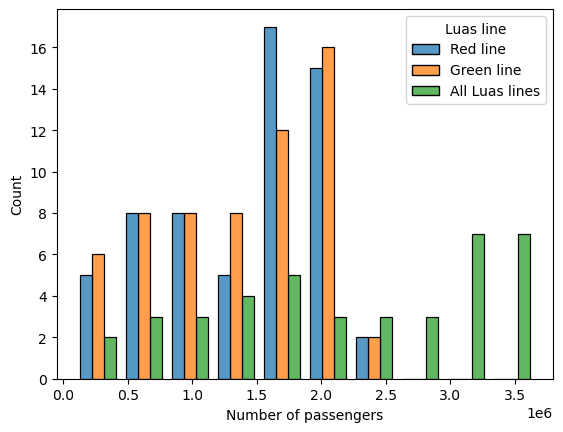

In [33]:
sns.histplot(data=luas1, x="Number of passengers", hue="Luas line", multiple="dodge", shrink=.8)

<Figure size 1000x800 with 0 Axes>

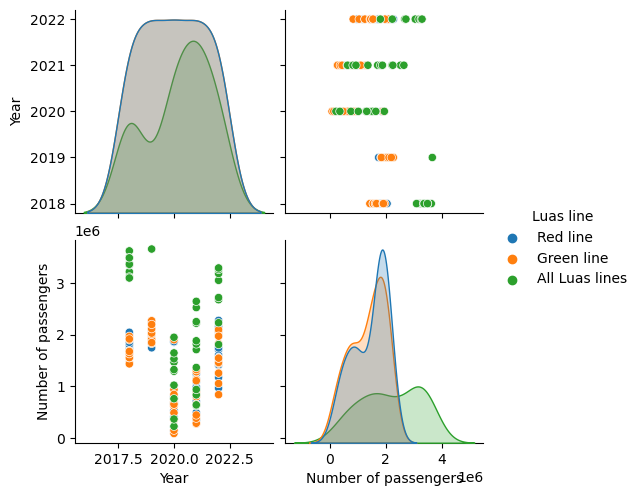

In [34]:
plt.figure(figsize=(10,8));
sns.pairplot(luas1, hue="Luas line");
plt.show()

In [35]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) 
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Number of passengers', window=30, sigma=10, view_fn=mpl_plot):
    avg = luas1[variable].rolling(window=window).mean()
    residual =luas1[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

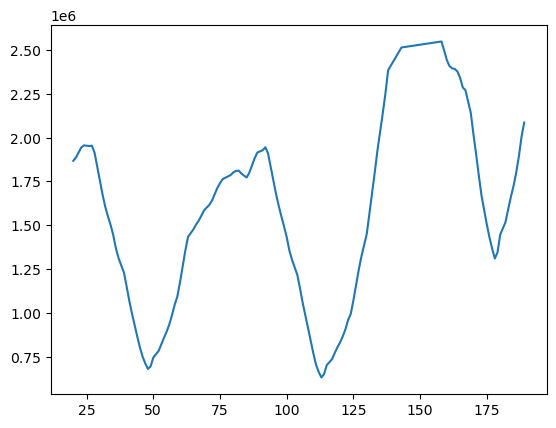

In [36]:
find_outliers(variable='Number of passengers', window=20, sigma=8)

In [37]:
luas1.describe()

,Year,Number of passengers
count,160.000000,1.600000e+02
mean,2020.056250,1.591336e+06
std,1.419748,8.144590e+05
min,2018.000000,8.935800e+04
25%,2019.000000,9.401260e+05
50%,2020.000000,1.662796e+06
75%,2021.000000,2.012204e+06
max,2022.000000,3.658484e+06


Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00113')
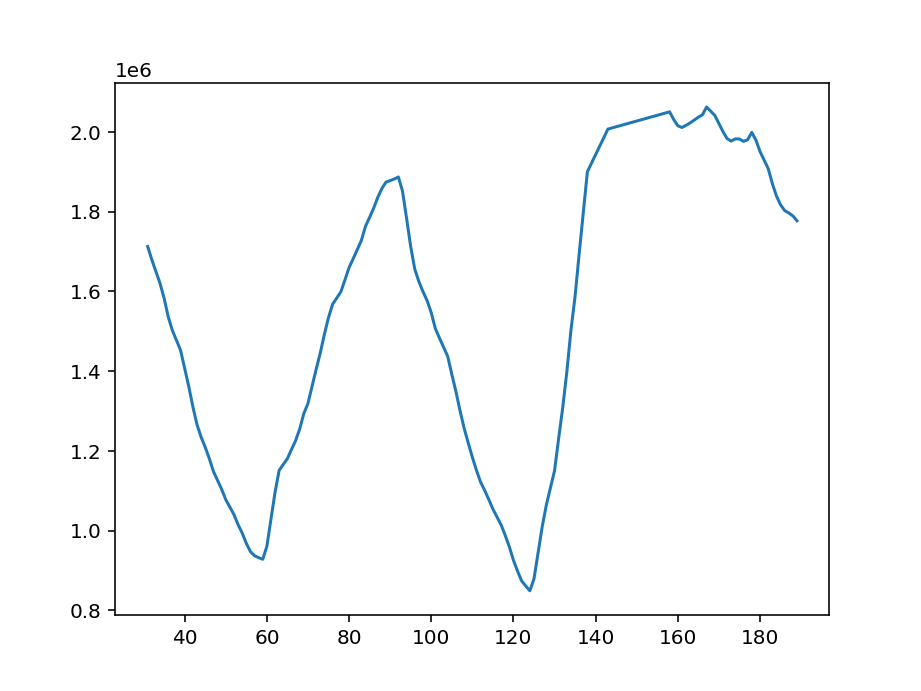

In [38]:
pn.extension()
pn.interact(find_outliers)

In [39]:
kw = dict(window=(1, 60), variable=sorted(list(luas1.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
print()

In [40]:
import hvplot.pandas

def hvplot(avg, highlight):
    return avg.hvplot(height=200) * highlight.hvplot.scatter(color='orange', padding=0.1)

text2 = "## Transport in ireland\nSelect the variable and the smoothing values"
hvp   = pn.interact(find_outliers, view_fn=hvplot, **kw)
pn.Column(pn.Row(pn.panel(text2, width=400), hvp[0]), hvp[1]).servable("Number of passengers")

Column
    [0] Row
        [0] Markdown(str, width=400)
        [1] Column
            [0] Select(name='variable', options=['Luas line', ...], value='Number of passengers')
            [1] IntSlider(end=60, name='window', start=1, value=30)
            [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row(sizing_mode='fixed')
        [0] HoloViews(Overlay, height=200, name='interactive00862', sizing_mode='fixed', width=700)

In [41]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [42]:
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [43]:
df = luas
# remove the all months from Month column to show only between January to December
month_to_remove = ['All months']
df = df[~df['Month'].isin(month_to_remove)]

# Build App
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Transport by Luas in Ireland"),
    
    dcc.Graph(id='graph'),

    html.Label("Select Year"),
    dcc.Dropdown(
        id='Year-dropdown',
        clearable=False,
        value=df['Year'].unique()[0],
        options=[
            {'label': year, 'value': year}
            for year in df['Year'].unique()
        ]
    ),
])

# Callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("Year-dropdown", "value")]
)
def update_figure(selected_year):
    filtered_df = df[df['Year'] == selected_year]
    return px.scatter(
        filtered_df,
        x="Month",
        y="Number of passengers",
        color="Luas line",
        render_mode="webgl",
        title=f"Luas Transport - {selected_year}"
    )

# Run app
app.run_server(mode='inline')


In [44]:
luas1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 189
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Luas line             160 non-null    object
 1   Year                  160 non-null    int64 
 2   Month                 160 non-null    object
 3   Number of passengers  160 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.2+ KB


# Statistical Analysis

In [45]:
luas1.describe()

,Year,Number of passengers
count,160.000000,1.600000e+02
mean,2020.056250,1.591336e+06
std,1.419748,8.144590e+05
min,2018.000000,8.935800e+04
25%,2019.000000,9.401260e+05
50%,2020.000000,1.662796e+06
75%,2021.000000,2.012204e+06
max,2022.000000,3.658484e+06


In [46]:
from scipy.stats import norm

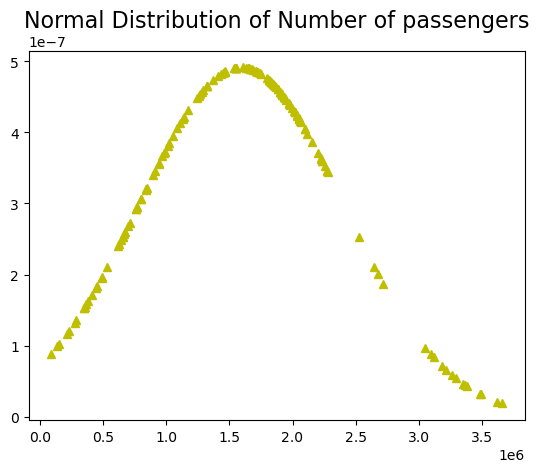

In [47]:
luas2 = luas1['Number of passengers'].values

# Calculate mean and standard deviation
mean_passengers = luas2.mean()
std_passengers = luas2.std()

# Generate normal PDF
normal_df = norm.pdf(luas2, loc=mean_passengers, scale=std_passengers)

# Plot the data points against the normal PDF
plt.plot(luas2, normal_df, 'y^')
plt.title("Normal Distribution of Number of passengers", fontsize=16)
plt.show()

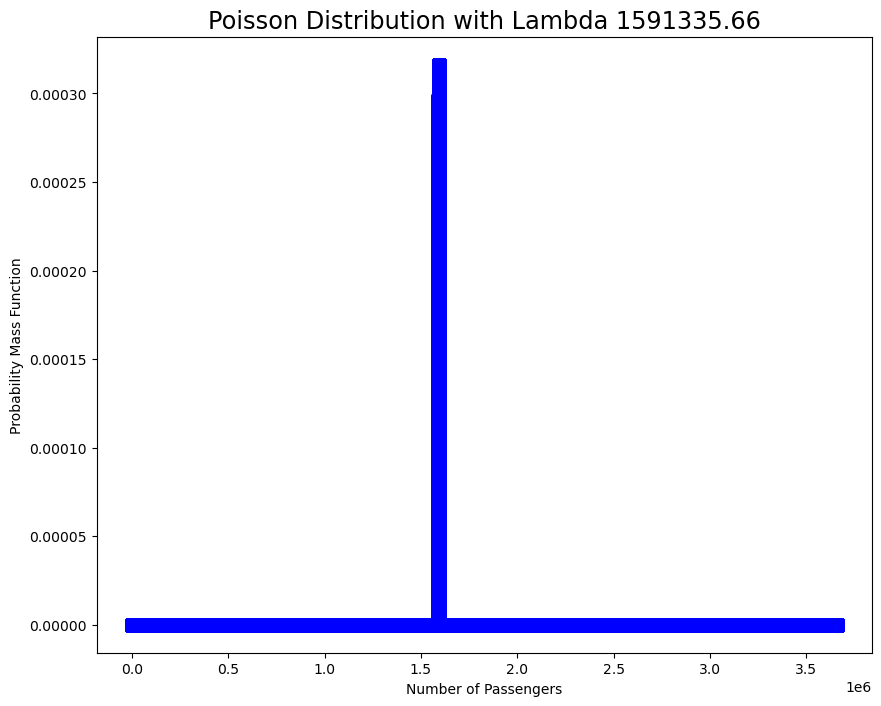

In [48]:
from scipy.stats import poisson
from math import factorial
def plot_poisson_distribution(column_values):
    # Calculate the mean and variance (lambda) of the Poisson distribution
    lambda_value = column_values.mean()

    # Generate x values from 0 to the maximum value in the data
    x = np.arange(0, column_values.max() + 1)

    # Calculate Poisson probability mass function
    y = poisson.pmf(x, mu=lambda_value)

    plt.figure(figsize=(10, 8))
    plt.title("Poisson Distribution with Lambda {:.2f}".format(lambda_value), fontsize="xx-large")
    plt.plot(x, y, 'bs', markersize=8)
    plt.xlabel('Number of Passengers')
    plt.ylabel('Probability Mass Function')
    plt.show()

# Call function
plot_poisson_distribution(luas1['Number of passengers'])


In [49]:
from scipy import stats

In [50]:
stats.norm.cdf(1.96)

0.9750021048517795

###Chi Squared test

In [51]:
table=pd.crosstab(luas1['Year'],luas1['Number of passengers'])
table

Number of passengers,89358,139275,152570,216344,228633,276338,288432,350566,352365,355048,...,3218649,3262491,3292231,3350056,3363274,3378751,3487373,3490513,3622338,3658484
Year,,,,,,,,,,,,,,,,,,,,,
2018,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,0
2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2021,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2022,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [52]:
value=stats.chi2_contingency(table)
value

Chi2ContingencyResult(statistic=640.0, pvalue=0.44804420652991594, dof=636, expected_freq=array([[0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.20625,
        0.20625, 0.20625, 0.20625, 0.20625, 0.20625, 0.206

##Wilcoxon Test

In [53]:
from scipy.stats import wilcoxon

data_before = luas1['Year']
data_after = luas1['Number of passengers']

statistic, p_value = wilcoxon(data_before, data_after)

print(f"Wilcoxon Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


Wilcoxon Statistic: 0.0
P-value: 5.23953462037631e-28
Reject the null hypothesis: There is a significant difference.


##T-Test

In [54]:
from scipy.stats import ttest_ind

data_year_2019 = luas1[luas1['Year'] == 2019]['Number of passengers']
data_year_2020 = luas1[luas1['Year'] == 2020]['Number of passengers']

statistic, p_value = ttest_ind(data_year_2019, data_year_2020, equal_var=False)

print(f"T-test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-test Statistic: 9.630882464170776
P-value: 1.8375295475598132e-13
Reject the null hypothesis: There is a significant difference.


# Machine Learning and Analysis

In [55]:
luas1.head(20)

,Luas line,Year,Month,Number of passengers
0,Red line,2018,January,1664495
1,Red line,2018,February,1657562
2,Red line,2018,March,1661098
3,Red line,2018,April,1794424
4,Red line,2018,May,1934553
5,Red line,2018,June,1822500
6,Red line,2018,July,1841184
7,Red line,2018,August,1730239
8,Red line,2018,September,1810919
9,Red line,2018,October,2018390


In [56]:
luas1.tail()

,Luas line,Year,Month,Number of passengers
185,All Luas lines,2022,April,2719243
186,All Luas lines,2022,May,3052020
187,All Luas lines,2022,June,3185330
188,All Luas lines,2022,July,3262491
189,All Luas lines,2022,August,3292231


In [57]:
# calling the method from preprocessing class and assign into variable
ord_encoder = OrdinalEncoder()             # Ordinal Data
lab_encoder = LabelEncoder()               # Label Data or Nominal Data
cat_encoder = OneHotEncoder(sparse=False)  # Categorical Data | Nominal

# assign data frame to new variable 
enluas1 = luas1
enluas1['Luas line'] = ord_encoder.fit_transform(enluas1[['Luas line']])
enluas1['Month'] = lab_encoder.fit_transform(enluas1['Month'])
enluas1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 189
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Luas line             160 non-null    float64
 1   Year                  160 non-null    int64  
 2   Month                 160 non-null    int64  
 3   Number of passengers  160 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.2 KB


In [58]:
enluas1.head()

,Luas line,Year,Month,Number of passengers
0,2.0,2018,4,1664495
1,2.0,2018,3,1657562
2,2.0,2018,7,1661098
3,2.0,2018,0,1794424
4,2.0,2018,8,1934553


In [59]:
enluas1.tail()

,Luas line,Year,Month,Number of passengers
185,0.0,2022,0,2719243
186,0.0,2022,8,3052020
187,0.0,2022,6,3185330
188,0.0,2022,5,3262491
189,0.0,2022,1,3292231


In [60]:
from sklearn.preprocessing import StandardScaler

enluas1_log_transformed = np.log1p(enluas1)

scaler = StandardScaler()
enluas1_scale = pd.DataFrame(scaler.fit_transform(enluas1_log_transformed), columns=enluas1.columns)


In [61]:
enluas1_scale.head()

,Luas line,Year,Month,Number of passengers
0,1.002099,-1.4532,-0.058779,0.328883
1,1.002099,-1.4532,-0.365519,0.322785
2,1.002099,-1.4532,0.587303,0.325898
3,1.002099,-1.4532,-2.271162,0.438685
4,1.002099,-1.4532,0.749211,0.548531


In [62]:
X =enluas1_scale[['Year']]
y =enluas1_scale['Number of passengers']

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')


Training MSE: 0.9606032103537538
Testing MSE: 0.92322427005994


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (128, 1)
X_test: (32, 1)
y_train: (128,)
y_test: (32,)


# Linear regression

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_preds_train = model.predict(X_train)
y_preds_test = model.predict(X_test)

In [68]:
print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.03816864457412594
-----Test set statistics-----
R-squared of the model in test set is: 0.03725583010936506
Root mean squared error of the prediction is: 0.9608456015718342
Mean absolute percentage error of the prediction is: 89.89004839659107


# RandomForest

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [70]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [71]:
y_pred_random = regressor.predict(X_test)

In [72]:
train_r_squared = regressor.score(X_train, Y_train)
print("R-squared of the model in the training set is: {}".format(train_r_squared))
test_r_squared = regressor.score(X_test, Y_test)
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(test_r_squared))
rmse_value = mean_squared_error(Y_test, y_pred_random) ** 0.5
print("Root mean squared error of the prediction is: {}".format(rmse_value))
mape_value = np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100
print("Mean absolute percentage error of the prediction is: {}".format(mape_value))

R-squared of the model in the training set is: 0.453990585436137
-----Test set statistics-----
R-squared of the model in the test set is: 0.3437357634357201
Root mean squared error of the prediction is: 0.7933001322129325
Mean absolute percentage error of the prediction is: 119.2126787561912


# Decision Tree

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [74]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [75]:
y_pred_DT = DTregressor.predict(X_test)

In [76]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 0.4552565076078975
-----Test set statistics-----
R-squared of the model in test set is: 0.35390735376920834
Root mean squared error of the prediction is: 0.7871283537723416
Mean absolute percentage error of the prediction is: 117.85177591580305


# Lasso Regression

In [77]:
lasso_regression = GridSearchCV(Lasso(), param_grid={'alpha': [0.01,0.1,5,42,100]}, verbose=1)
lasso_regression.fit(X_train, Y_train)
lasso_value = lasso_regression.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [78]:
y_lasso_pridct_train = lasso_value.predict(X_train)
y_lasso_pridct_test = lasso_value.predict(X_test)

In [79]:
print("R-squared of the model in Training set is: {}%\n".format(round(lasso_value.score(X_train,Y_train)*100,3)))
print("*****Statistical Value for Test Model*****\n")
print("R-squared of the model in Test set is: {}%".format(round(lasso_value.score(X_test,Y_test)*100,3)))
print("Root mean squared error of the prediction is: {}%".format(round(rmse(Y_test,y_lasso_pridct_test)*100,3)))
print("Mean absolute percentage error of the prediction is: {}%".format(round(np.mean(np.abs((Y_test - y_lasso_pridct_test)/ Y_test))*100,3)))

R-squared of the model in Training set is: 2.886%

*****Statistical Value for Test Model*****

R-squared of the model in Test set is: -0.441%
Root mean squared error of the prediction is: 98.141%
Mean absolute percentage error of the prediction is: 92.553%


# Logistic regression

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [81]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [82]:
import statsmodels.api as sm

In [83]:
X_train

,Year
6,-1.453200
25,-0.039393
21,-0.746121
75,-0.746121
84,-0.039393
...,...
87,-0.039393
103,0.666986
67,-1.453200
24,-0.039393


In [84]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Number of passengers   No. Observations:                  112
Model:                              GLM   Df Residuals:                      110
Model Family:                  Binomial   Df Model:                            1
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                    nan
Date:                  Fri, 12 Jan 2024   Deviance:                       7187.9
Time:                          12:30:29   Pearson chi2:                 4.67e+17
No. Iterations:                      10   Pseudo R-squ. (CS):                nan
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.302e+15   6.34e+06  -3.63e+08      0.000    -2.3e+15    -2.3e+15
Year         -1.1e+15   6.29e+06  -1.75e+08      0.000    -1.1e+15    -1.1e+15
==============================================================================
"""

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are your features and target variable
# Replace this with your actual data
X = enluas1_scale[['Luas line', 'Month', 'Year']]
threshold =  1
y = (enluas1_scale['Number of passengers'] > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.96875

Confusion Matrix:
[[30  1]
 [ 0  1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.50      1.00      0.67         1

    accuracy                           0.97        32
   macro avg       0.75      0.98      0.83        32
weighted avg       0.98      0.97      0.97        32

